In [2]:
%pip install tensorflow==2.17.0 opencv-python matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
   

In [3]:
#importing dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt
import shutil
import tarfile


In [4]:
#import tensorflow dependencies - Functional API
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer,Conv2D,Dense,MaxPooling2D,Input,Flatten



#Collecting neg-images from google drive


In [6]:
#importing the file from drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
data = '/content/drive/MyDrive/ifw.tgz'

In [8]:
#changing the location of file in drive to sample_data

source_path = '/content/drive/MyDrive/lfw.tgz'
# Specify the destination path in Colab's local directory
destination_path = '/content/sample_data/data/lfw.tgz'
# Copy the file from Google Drive to the local directory
shutil.copy(source_path, destination_path)

#unzipping files of tar type
extract_path = '/content/sample_data/data/'
with tarfile.open(destination_path, 'r:gz') as tar_ref:
    tar_ref.extractall(extract_path)



In [9]:
import os

# Define the source and destination directories
source_dir = '/content/sample_data/data/lfw/'
destination_dir = '/content/sample_data/data/NEG_PATH/'

# Ensure the destination directory exists
os.makedirs(destination_dir, exist_ok=True)

# Iterate through the source directory
for directory in os.listdir(source_dir):
    # Build the path for the subdirectories
    dir_path = os.path.join(source_dir, directory)

    # Check if the path is a directory
    if os.path.isdir(dir_path):
        for file in os.listdir(dir_path):
            # Build the full path for the source file
            src_path = os.path.join(dir_path, file)

            # Build the full path for the destination file
            dest_path = os.path.join(destination_dir, file)

            # Move the file
            os.replace(src_path, dest_path)



Collecting positive images and Anchor images

In [10]:
source_path = '/content/drive/MyDrive/positive'
# Specify the destination path in Colab's local directory
destination_path = '/content/sample_data/data/POS_PATH/'
# Copy the file from Google Drive to the local directory
shutil.copytree(source_path, destination_path)

'/content/sample_data/data/POS_PATH/'

In [11]:
source_path = '/content/drive/MyDrive/anchor'
# Specify the destination path in Colab's local directory
destination_path = '/content/sample_data/data/ANC_PATH/'
# Copy the file from Google Drive to the local directory
shutil.copytree(source_path, destination_path)

'/content/sample_data/data/ANC_PATH/'

load and preprocess images


In [104]:
import os

# Define paths
ANC_PATH = '/content/sample_data/data/ANC_PATH/'
POS_PATH = '/content/sample_data/data/POS_PATH/'
NEG_PATH = '/content/sample_data/data/NEG_PATH/'

# Print file lists for debugging
print("Files in ANC_PATH:", os.listdir(ANC_PATH))
print("Files in POS_PATH:", os.listdir(POS_PATH))
print("Files in NEG_PATH:", os.listdir(NEG_PATH))

# Create TensorFlow datasets
try:
    anchor = tf.data.Dataset.list_files(ANC_PATH + '*.jpg').take(300)
    positive = tf.data.Dataset.list_files(POS_PATH + '*.jpg').take(300)
    negative = tf.data.Dataset.list_files(NEG_PATH + '*.jpg').take(300)
    print("Datasets created successfully.")
except Exception as e:
    print(f"Error creating datasets: {e}")

Files in ANC_PATH: ['4036ee50-4e98-11ef-bf95-8d590daf0e0e.jpg', '7fba7d3b-4e98-11ef-b14f-8d590daf0e0e.jpg', '4f1e0539-4e96-11ef-99e9-8d590daf0e0e.jpg', '0938282b-4e98-11ef-aead-8d590daf0e0e.jpg', '50189193-4e96-11ef-8489-8d590daf0e0e.jpg', '0e9e3e2b-4e97-11ef-a130-8d590daf0e0e.jpg', 'fe50d21b-4e95-11ef-bf2a-8d590daf0e0e.jpg', '35d9591b-4e98-11ef-9cf4-8d590daf0e0e.jpg', '9dc30271-4e98-11ef-abe6-8d590daf0e0e.jpg', '4469a157-4e96-11ef-b513-8d590daf0e0e.jpg', '488d439b-4e96-11ef-96f5-8d590daf0e0e.jpg', '86a6848b-4e98-11ef-bccb-8d590daf0e0e.jpg', 'd8b72313-4e96-11ef-b21a-8d590daf0e0e.jpg', '49732547-4e98-11ef-8813-8d590daf0e0e.jpg', 'f1c0ce00-4e94-11ef-8e49-8d590daf0e0e.jpg', '7ec435f9-4e98-11ef-ae41-8d590daf0e0e.jpg', '13e57e0e-4e96-11ef-9cdf-8d590daf0e0e.jpg', '4fd89a08-4e96-11ef-b837-8d590daf0e0e.jpg', '433c1e99-4e98-11ef-b9c9-8d590daf0e0e.jpg', 'd96c7fb7-4e96-11ef-bb2c-8d590daf0e0e.jpg', '3b382f1f-4e98-11ef-9131-8d590daf0e0e.jpg', '4ffe7323-4e96-11ef-8376-8d590daf0e0e.jpg', '9e2d809f-4e

In [105]:
dir_test = anchor.as_numpy_iterator()


In [106]:

print(dir_test.next())

b'/content/sample_data/data/ANC_PATH/4fe68b0f-4e96-11ef-b747-8d590daf0e0e.jpg'


Preprocessing -Scale and Resize

In [107]:
#preprocessing image
def preprocess(file_path):

    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)

    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1
    img = img / 255.0

    # Return image
    return img

In [108]:
img = preprocess('/content/sample_data/data/ANC_PATH/d89fe645-4e96-11ef-9158-8d590daf0e0e.jpg')
img.numpy().max()
#dataset.map(preprocess)

0.85882354

In [109]:
#Creating labelled data set
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [110]:

samples = data.as_numpy_iterator()


In [111]:
exampple = samples.next()

In [112]:

exampple


(b'/content/sample_data/data/ANC_PATH/e027240b-4e96-11ef-a905-8d590daf0e0e.jpg',
 b'/content/sample_data/data/POS_PATH/00387e9a-4e98-11ef-ac4f-8d590daf0e0e.jpg',
 1.0)

In [113]:
#build Train and Test partition
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

res = preprocess_twin(*exampple)



In [114]:

# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [23]:

# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [115]:

# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

Building Embedding layer

In [116]:

inp = Input(shape=(100,100,3), name='input_image')


In [117]:

c1 = Conv2D(64, (10,10), activation='relu')(inp)
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

mod = Model(inputs=[inp], outputs=[d1], name='embedding')


mod.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 91, 91, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 40, 40, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 17, 17, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [118]:
def make_embedding():
    inp = Input(shape=(100,100,3), name='input_image')

    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

    # Third block
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)


    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [119]:
embedding = make_embedding()

In [120]:

embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 91, 91, 64)          │          19,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 40, 40, 128)         │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 17, 17, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 6, 6, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4096)                │      37,752,832 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

Building distance layer


In [121]:
'''# Siamese L1 Distance class
class L1Dist(Layer):

    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()

    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)
        '''
import tensorflow as tf
from tensorflow.keras.layers import Layer

class L1Dist(Layer):
    def __init__(self, **kwargs):
        super(L1Dist, self).__init__(**kwargs)

    def call(self, input_embedding, validation_embedding):
        # Ensure inputs are tensors
        input_embedding = tf.convert_to_tensor(input_embedding)
        validation_embedding = tf.convert_to_tensor(validation_embedding)

        # Compute the absolute difference
        return tf.math.abs(input_embedding - validation_embedding)

    def compute_output_shape(self, input_shape):
        return input_shape[0]

In [122]:

l1 = L1Dist()

#l1(anchor_embedding, validation_embedding)

Make Siamese Model

In [123]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

siamese_layer = L1Dist()


In [124]:
distances = siamese_layer(inp_embedding, val_embedding)

classifier = Dense(1, activation='sigmoid')(distances)

classifier
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')
siamese_network.summary()


Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)    │ (None, 100, 100, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ validation_img            │ (None, 100, 100, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Functional)    │ (None, 4096)           │     38,960,448 │ input_img[0][0],       │
│                           │                        │                │ validation_img[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ l1_dist_5 (L1Dist)        │ (None, 4096)           │              0 │ embedding[0][0],       │
│                           │                        │                │ embedding[1][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 1)              │          4,097 │ l1_dist_5[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [125]:
def make_siamese_model():

    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))

    # Validation image in the network
    validation_image = Input(name='validation_img', shape=(100,100,3))

    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))

    # Classification layer
    classifier = Dense(1, activation='sigmoid')(distances)

    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [126]:

siamese_model = make_siamese_model()

In [127]:

siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)    │ (None, 100, 100, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ validation_img            │ (None, 100, 100, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Functional)    │ (None, 4096)           │     38,960,448 │ input_img[0][0],       │
│                           │                        │                │ validation_img[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ l1_dist_6 (L1Dist)        │ (None, 4096)           │              0 │ embedding[2][0],       │
│                           │                        │                │ embedding[3][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │          4,097 │ l1_dist_6[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

Training

In [128]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

opt = tf.keras.optimizers.Adam(1e-4) # 0.0001
checkpoint_dir = '/content/sample_data/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)


In [129]:
test_batch = train_data.as_numpy_iterator()

In [130]:
batch_1 = test_batch.next()
len(batch_1[1])

16

In [131]:
X = batch_1[:2]

In [49]:
y = batch_1[2]
y

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

In [132]:
@tf.function
def train_step(batch):

    # Record all of our operations
    with tf.GradientTape() as tape:
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        # Forward pass
        yhat = siamese_model(X, training=True)
        y = batch[2]
        if y.shape != yhat.shape:
        # Reshape y to match the shape of yhat
          y = tf.reshape(y, tf.shape(yhat))
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)

    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)

    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))

    # Return loss
    return loss

Building Training loop

In [133]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [134]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))

        # Creating a metric object
        r = Recall()
        p = Precision()

        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here

            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat)

            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())

        # Save checkpoints
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

Train the model

In [135]:
EPOCHS = 50

In [136]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/stepTensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
19/19 ━━━━━

In [137]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [138]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [139]:
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[[1.04161157e-12],
        [3.75021498e-12],
        [2.91173369e-01],
        [1.09535020e-11],
        [4.82024974e-04],
        [2.54845276e-04],
        [1.06229799e-11],
        [1.92639290e-11],
        [9.94512558e-01],
        [9.99999881e-01],
        [1.11518290e-07],
        [1.00000000e+00],
        [1.14886406e-10],
        [6.48001075e-09],
        [6.28778800e-12],
        [6.53887525e-07]]], dtype=float32)

In [140]:

# Post processing the results

y_hat = np.array(y_hat)  # Ensure y_hat is a NumPy array

# Apply thresholding to convert predictions to binary values
# Here we assume binary classification per example
binary_predictions = (y_hat > 0.5).astype(int)
binary_predictions

array([[[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0]]])

In [141]:
y_true

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

In [142]:
# Creating a metric object
m = Recall()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [145]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat)

print(r.result().numpy(), p.result().numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1.0 0.95238096


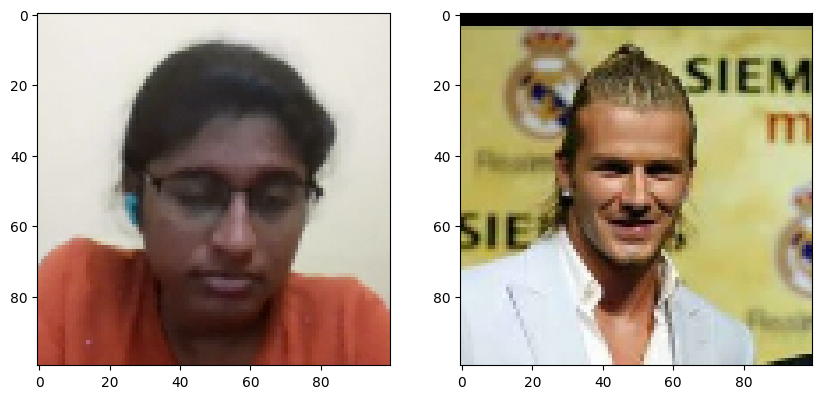

In [146]:
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

In [147]:
# Save weights
siamese_model.save('siamesemodelv2.h5')

In [148]:
# Make predictions with reloaded model
siamese_model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[[2.0914576e-12],
        [7.6512886e-11],
        [3.0210435e-11],
        [2.1930434e-06],
        [3.9409343e-07],
        [9.9451256e-01],
        [7.0805450e-09],
        [1.0953522e-11],
        [3.1443663e-12],
        [3.6860996e-08],
        [3.5396278e-10],
        [2.8796006e-11],
        [7.0404307e-12],
        [9.1580049e-11]]], dtype=float32)

In [149]:
# View model summary
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_img (InputLayer)    │ (None, 100, 100, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ validation_img            │ (None, 100, 100, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Functional)    │ (None, 4096)           │     38,960,448 │ input_img[0][0],       │
│                           │                        │                │ validation_img[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ l1_dist_6 (L1Dist)        │ (None, 4096)           │              0 │ embedding[2][0],       │
│                           │                        │                │ embedding[3][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │          4,097 │ l1_dist_6[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

# **Final verification of images**

In [65]:
#application_data\verification_images

In [150]:
import os
import shutil
import random

# Define paths
source_dir = '/content/sample_data/data/POS_PATH'
destination_dir = '/content/sample_data/application_data/verificatioin_images'

# Create destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# List all files in the source directory
all_images = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

# Shuffle the list of images
random.shuffle(all_images)

# Select the first 50 images
selected_images = all_images[:10]

# Move the selected images to the destination directory
for image in selected_images:
    # Construct full file paths
    src_path = os.path.join(source_dir, image)
    dest_path = os.path.join(destination_dir, image)

    # Move the file
    shutil.move(src_path, dest_path)

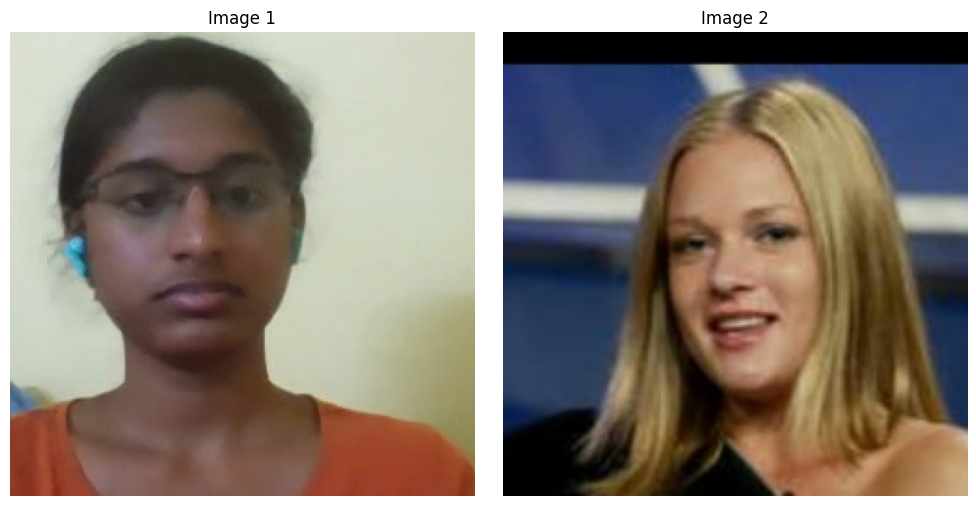

In [165]:
#input images
img1 = Image.open('/content/sample_data/application_data/input_image/input_image1.jpg')
img2 = Image.open('/content/sample_data/application_data/input_image/input_image2.jpg')

# Plot the images
plt.figure(figsize=(10, 5))

# Plot the first image
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Image 1')
plt.axis('off')  # Hide axis

# Plot the second image
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Image 2')
plt.axis('off')  # Hide axis

# Adjust layout
plt.tight_layout()
plt.show()

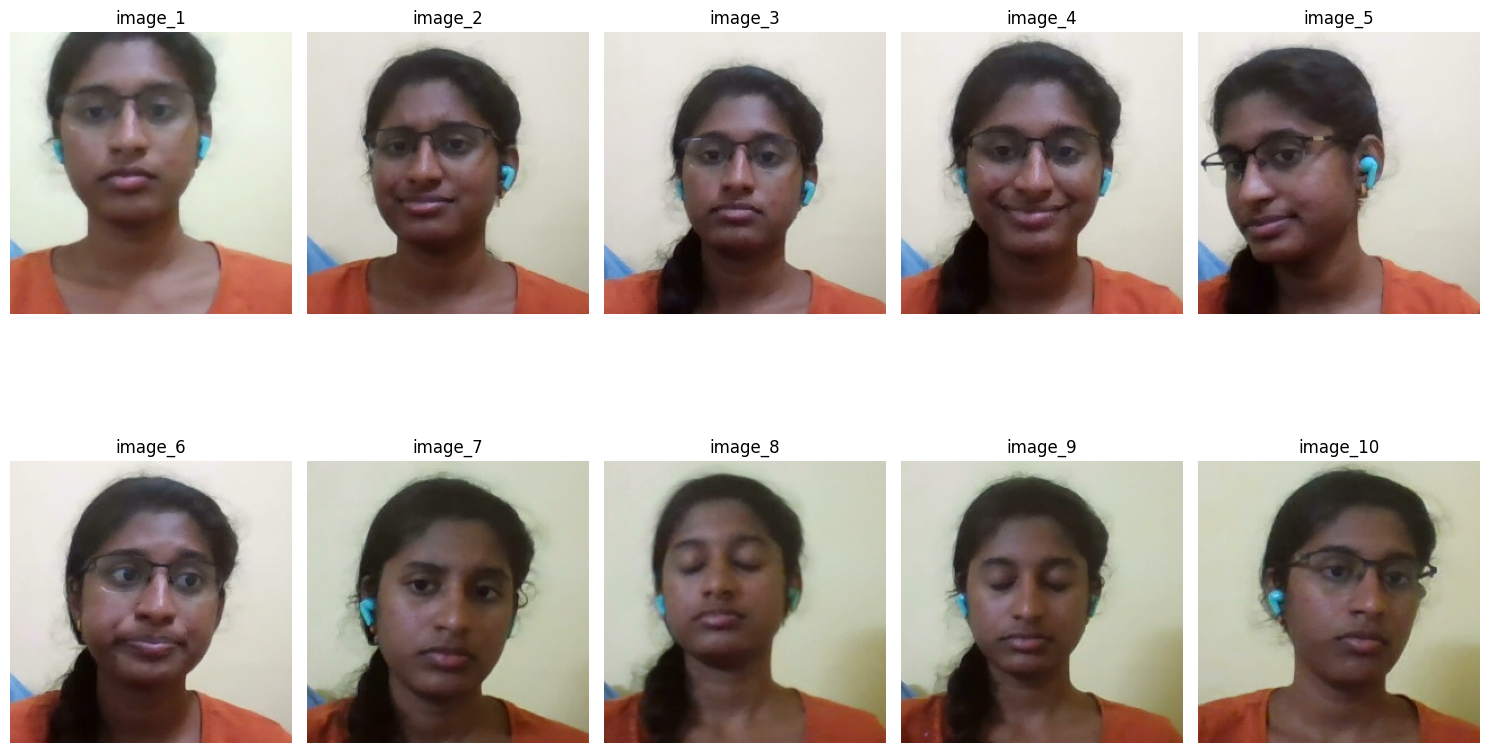

In [167]:
#verification images
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Example dictionary of images
# Replace these paths with actual paths or image loading code
images_dict = {
    'image_1': np.array(Image.open('/content/sample_data/application_data/verification_images/00387e9a-4e98-11ef-ac4f-8d590daf0e0e.jpg')),
    'image_2': np.array(Image.open('/content/sample_data/application_data/verification_images/0b3dfd92-4e98-11ef-8f37-8d590daf0e0e.jpg')),
    'image_3': np.array(Image.open('/content/sample_data/application_data/verification_images/67f55326-4e98-11ef-bbca-8d590daf0e0e.jpg')),
    'image_4': np.array(Image.open('/content/sample_data/application_data/verification_images/9c934ad0-4e98-11ef-9325-8d590daf0e0e.jpg')),
    'image_5': np.array(Image.open('/content/sample_data/application_data/verification_images/a08c5292-4e98-11ef-972e-8d590daf0e0e.jpg')),
    'image_6': np.array(Image.open('/content/sample_data/application_data/verification_images/a3de31a0-4e98-11ef-9495-8d590daf0e0e.jpg')),
    'image_7': np.array(Image.open('/content/sample_data/application_data/verification_images/a6329f9d-4e96-11ef-aef0-8d590daf0e0e.jpg')),
    'image_8': np.array(Image.open('/content/sample_data/application_data/verification_images/af5f9e91-4e96-11ef-81fa-8d590daf0e0e.jpg')),
    'image_9': np.array(Image.open('/content/sample_data/application_data/verification_images/b0be5df0-4e96-11ef-97bd-8d590daf0e0e.jpg')),
    'image_10': np.array(Image.open('/content/sample_data/application_data/verification_images/bdb7a7fb-4e94-11ef-a83c-8d590daf0e0e.jpg')),
}

def plot_images(images_dict):
    # Number of images
    num_images = len(images_dict)

    # Number of columns in the grid
    cols = 5
    # Calculate number of rows needed
    rows = (num_images // cols) + (num_images % cols > 0)

    # Create a figure with the appropriate size
    plt.figure(figsize=(15, 5 * rows))

    # Iterate through the dictionary and plot each image
    for i, (key, img) in enumerate(images_dict.items()):
        plt.subplot(rows, cols, i + 1)  # Create a subplot for each image
        plt.imshow(img)                # Display the image
        plt.title(key)                 # Set the title from dictionary key
        plt.axis('off')                # Hide the axes

    # Adjust layout to prevent overlap
    plt.tight_layout()
    # Display the plot
    plt.show()

# Call the function to plot images
plot_images(images_dict)

Verification for input image1

In [157]:
#verification_function for input image 1
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('/content/sample_data/application_data', 'verification_images')):
        input_img = preprocess(os.path.join('/content/sample_data/application_data', 'input_image', 'input_image1.jpg'))
        validation_img = preprocess(os.path.join('/content/sample_data/application_data', 'verification_images', image))

        # Make Predictions
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)

    # Detection Threshold: Metric above which a prediciton is considered positive
    detection = np.sum(np.array(results) > detection_threshold)

    # Verification Threshold: Proportion of positive predictions / total positive samples
    verification = detection / len(os.listdir(os.path.join('/content/sample_data/application_data', 'verification_images')))
    verified = verification > verification_threshold
    return results, verified

In [158]:
results, verified = verify(siamese_model, 0.5, 0.5)
print(verified)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
True


Verification for input image 2

In [161]:
#verification_function for input image 2
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('/content/sample_data/application_data', 'verification_images')):
        input_img = preprocess('/content/sample_data/application_data/input_image/input_image2.jpg')
        validation_img = preprocess(os.path.join('/content/sample_data/application_data', 'verification_images', image))

        # Make Predictions
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)

    # Detection Threshold: Metric above which a prediciton is considered positive
    detection = np.sum(np.array(results) > detection_threshold)

    # Verification Threshold: Proportion of positive predictions / total positive samples
    verification = detection / len(os.listdir(os.path.join('/content/sample_data/application_data', 'verification_images')))
    verified = verification > verification_threshold
    return results, verified

In [162]:
results, verified = verify(siamese_model, 0.5, 0.5)
print(verified)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
False
